### DATA EXTRACTION

In [1]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')

### DATA REVIEW

In [2]:
print("Number of passangers:",len(titanic_data))
titanic_data.columns
titanic_data.dtypes

titanic_data['class'].unique()

titanic_data.isnull().sum()

Number of passangers: 891


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### DATA TRANSFORMATION

In [3]:
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['class'] = titanic_data['class'].astype(str)
titanic_data.fillna(0, inplace=True)
titanic_data.drop(['alive', 'alone', 'adult_male', 'deck'], axis=1, inplace=True)

titanic_data.isnull().sum()

titanic_data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 0], dtype=object)

In [4]:
# Mapping for embark_town
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Mapping for sex
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Mapping for embarked
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0 : 0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Mapping for class
class_mapping = {'Third': 1, 'First': 2, 'Second': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

# Mapping for who
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
titanic_data['who'] = titanic_data['who'].map(who_mapping)


In [ ]:
titanic_data.isnull().sum() #NO MORE EMPTY VALUES

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
dtype: int64

### TRAIN AND TEST SPLIT

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = titanic_data.drop('survived', axis=1) #Independent variables
y = titanic_data['survived'] #Dependent variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

CREATE DATA MODEL

In [9]:
from sklearn.neighbors import KNeighborsClassifier # import the model

In [10]:
model = KNeighborsClassifier() #initialize

In [11]:
model.fit(X_train, y_train) #train the model

KNeighborsClassifier()

In [12]:
prediction_knn = model.predict(X_test) #predict on test dataset, test dset the model has not seen

How good is the model?
![800px-Precisionrecall.svg[1].png](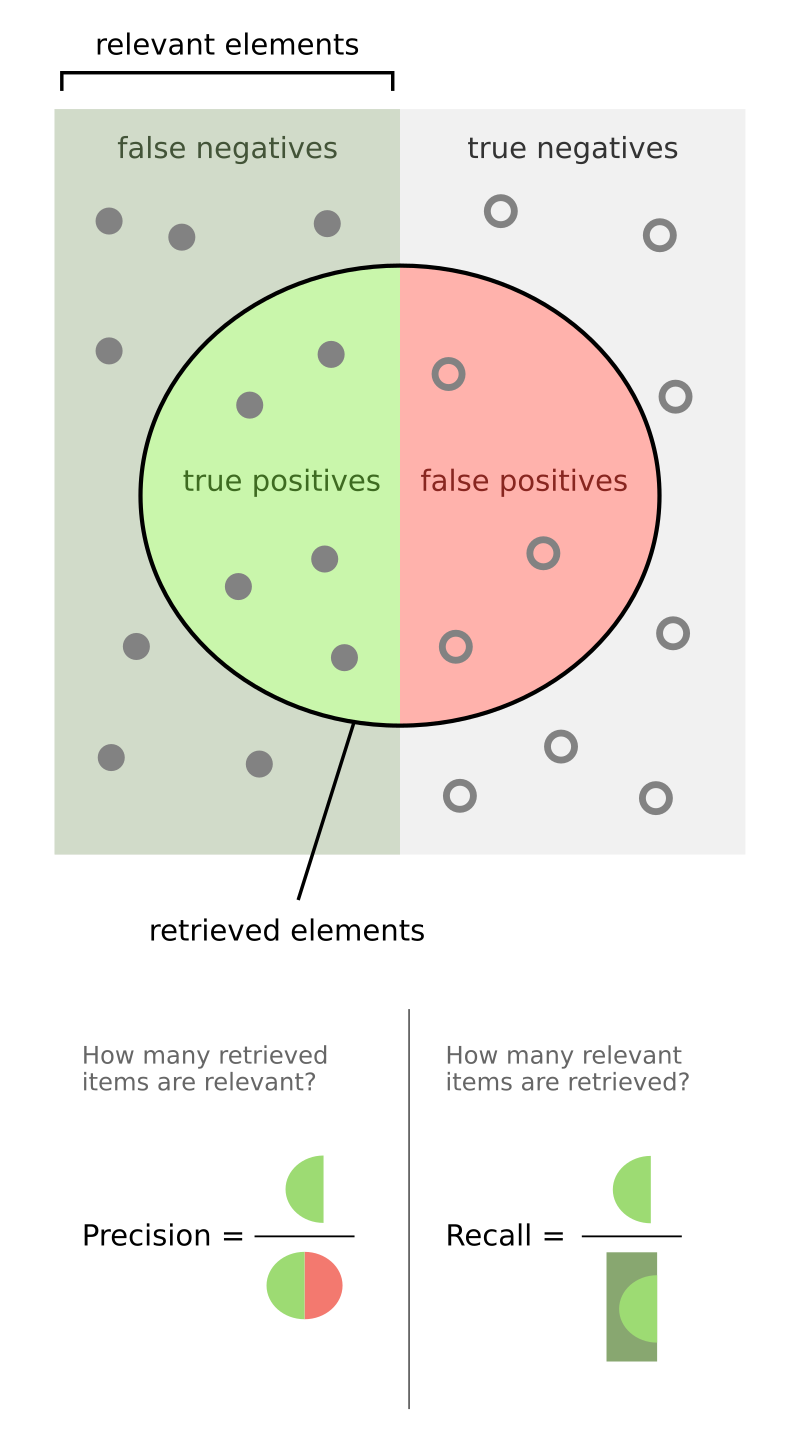)

https://scikit-learn.org/stable/modules/model_evaluation.html - different evaluation methods

![1N4Lo9Miw397g3XpX7o0CDw[1].png](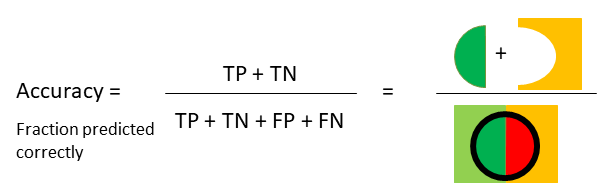)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(prediction_knn, y_test)

0.6312849162011173

CONFUSION MATRIX
[Documentation](https://https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, prediction_knn)

In [20]:
print(cm)

[[78 27]
 [39 35]]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

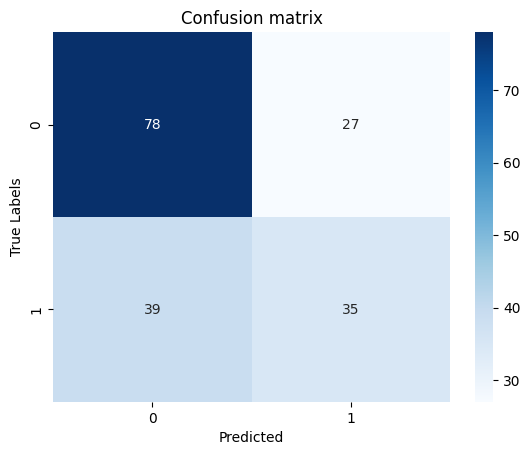

In [25]:
# visualize a heatmap from cm using seaborn

sns.heatmap(cm, annot=True, cmap='Blues') # annot will give values in the boxes
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

**Python- Central Limit Theorem **

**What is central limit theorem ?**

Central Limit Theorem states that, under certain conditions, the sum or average of a large number of independent and identically distributed random variables will be approximately normally distributed, regardless of the original distribution of the variables.


**What are the three rules of central limit theorem?**

The three key implications for  applying the central limit theorem effectively:


**Independence:** The random variables being averaged or summed must be independent of each other.

**Identical Distribution:** Each random variable should be identically distributed, meaning they come from the same population or distribution.

**Sample Size:** For the distribution of sample means or sums to approximate a normal distribution, the sample size should be sufficiently large(at least 30).

**What is the main principle of central limit theorem?**

The main principle of the Central Limit Theorem (CLT) is that regardless of the original distribution of independent and identically distributed random variables, their sum or average will tend towards a normal distribution as the sample size increases.

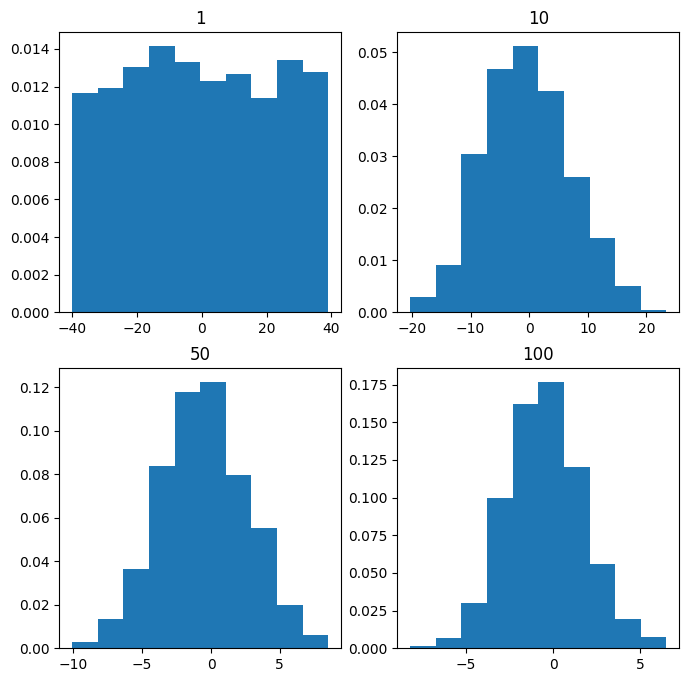

In [28]:
import numpy
import matplotlib.pyplot as plt

# number of sample
num = [1, 10, 50, 100]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()